In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("improved_training_data_A.csv")
df

,Price,Brand,Model,Year,Color,Fuel_Type,Vehicle_History,Palestinian_Licence,Transmission_Type,Electric_Windows,Engine_Capacity,Kilometers_Driven,Seats,Installment_Payment_Method,Listed_For,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Magnesium_Rims,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Ranges,Previous_Owners_Labels
0,100000,كيا,اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,1,اوتوماتيك,1,2000,75000.0,5,0,للبيع فقط,0,1,1,1,1,1,1,1,1,-0.629108,[0-2],1
1,60000,كيا,سورينتو,2007,سكني,ديزل,خصوصي,1,نصف اوتوماتيك,1,2500,130000.0,8,1,للبيع أو التبديل,2,1,1,1,1,1,1,1,1,-0.333756,[0-2],1
2,43500,هونداي,افانتي,2006,سكني,بنزين,خصوصي,1,اوتوماتيك,1,1600,175154.0,5,0,للبيع فقط,1,1,1,1,1,1,1,1,1,-0.091277,[0-2],1
3,5500,فيات,127,1982,بيج,بنزين,خصوصي,1,عادي,0,906,844862.0,5,1,للبيع فقط,4,1,1,0,0,0,0,1,0,3.505080,[3-4],2
4,54000,بيجو,208,2014,فضي,بنزين,خصوصي,1,اوتوماتيك,1,1200,38000.0,5,0,للبيع فقط,0,0,1,1,1,1,1,0,0,-0.827799,[0-2],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6541,50000,كيا,سول,2012,أبيض,ديزل,خصوصي,1,اوتوماتيك,1,1600,249037.0,5,0,للبيع فقط,1,1,1,1,1,0,0,0,0,0.305478,[0-2],1
6542,45000,كيا,مورننغ,2015,فيراني,كهرباء,خصوصي,1,اوتوماتيك,1,1000,130000.0,5,1,للبيع فقط,2,0,1,1,1,1,1,0,0,-0.333756,[0-2],1
6543,48000,فورد,ترانزيت,2002,أبيض,ديزل,عمومي,1,عادي,1,2400,475435.0,8,0,للبيع فقط,5,1,0,0,0,0,0,0,0,1.521243,[5+),3
6544,87000,بيجو,بارتنر,2018,فضي,ديزل,خصوصي,1,عادي,1,1600,50000.0,5,0,للبيع فقط,0,1,1,1,1,0,1,0,0,-0.763359,[0-2],1


#### Now we have a few catagorical features that need to be transformed to numerical types, one of the ways we can do that is dealing with each unique value as a stand alone feature, the only thing that i am hesitant about is wheather i merge the Brand and the Model features into one or keep them as they are currenlty, we can't judge until we compare the two approaches, so lets start 

###### Brand

In [3]:
brand_le = LabelEncoder()
brand_labels = brand_le.fit_transform(df['Brand'])

brand_onehot = OneHotEncoder()
brand_feature_arr = brand_onehot.fit_transform(
                              df[['Brand']]).toarray()

brand_onehot_feature_labels = list(brand_le.classes_)

brand_onehot_features = pd.DataFrame(brand_feature_arr, 
                            columns=brand_onehot_feature_labels)

df = pd.concat([df[df.columns],brand_onehot_features],axis=1)

###### Model

In [4]:
model_le = LabelEncoder()
model_labels = model_le.fit_transform(df['Model'])

model_onehot = OneHotEncoder()
model_feature_arr = model_onehot.fit_transform(
                              df[['Model']]).toarray()

model_onehot_feature_labels = ['Model_'+str(label)
                           for label in model_le.classes_]

model_onehot_features = pd.DataFrame(model_feature_arr, 
                            columns=model_onehot_feature_labels)
df = pd.concat([df[df.columns],model_onehot_features],axis=1)

In [5]:
# df["Brand_Model"] = df["Brand"] + "_" + df["Model"]

In [6]:
# brand_model_le = LabelEncoder()
# brand_model_labels = brand_model_le.fit_transform(df['Brand_Model'])

# brand_model_onehot = OneHotEncoder()
# brand_model_feature_arr = brand_model_onehot.fit_transform(
#                               df[['Brand_Model']]).toarray()

# brand_model_onehot_feature_labels = list(brand_model_le.classes_)

# brand_model_onehot_features = pd.DataFrame(brand_model_feature_arr, 
#                             columns=brand_model_onehot_feature_labels)

# df = pd.concat([df[df.columns],brand_model_onehot_features],axis=1)

##### Now i want to remove some features that i think are irrelevant to car price. the Color, and Magnesium_Rims, Listed_For, these three don't provide much of a value so i am removing them

In [7]:
df = df.drop(columns=["Color","Magnesium_Rims","Listed_For"]).reset_index(drop=True)

##### Now Let's continue

###### Fuel_Type

In [8]:
fuel_type_le = LabelEncoder()
fuel_type_labels = fuel_type_le.fit_transform(df['Fuel_Type'])

fuel_type_onehot = OneHotEncoder()
fuel_type_feature_arr = fuel_type_onehot.fit_transform(
                              df[['Fuel_Type']]).toarray()

fuel_type_onehot_feature_labels = list(fuel_type_le.classes_)

fuel_type_onehot_features = pd.DataFrame(fuel_type_feature_arr, 
                            columns=fuel_type_onehot_feature_labels)

##### Now regarding the fuel type, its know for the cars that are hyprid or electric to be a bit more pricey than other cars, so to accommodate for this, i would think that after we did the onehotencoding giving a bit more weight to the hyprid and electric variants would make sense, so let's do it

In [9]:
fuel_type_onehot_features["كهرباء "] = fuel_type_onehot_features["كهرباء "]*2.5
fuel_type_onehot_features["هايبرد "] = fuel_type_onehot_features["هايبرد "]*1.5

df = pd.concat([df[df.columns],fuel_type_onehot_features],axis=1)
fuel_type_onehot_features

,بنزين,ديزل,كهرباء,هايبرد
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
6541,0.0,1.0,0.0,0.0
6542,0.0,0.0,2.5,0.0
6543,0.0,1.0,0.0,0.0
6544,0.0,1.0,0.0,0.0


###### Vehicle_History

In [10]:
vehicle_history_le = LabelEncoder()
vehicle_history_labels = vehicle_history_le.fit_transform(df['Vehicle_History'])

vehicle_history_onehot = OneHotEncoder()
vehicle_history_feature_arr = vehicle_history_onehot.fit_transform(
                              df[['Vehicle_History']]).toarray()

vehicle_history_onehot_feature_labels = list(vehicle_history_le.classes_)

vehicle_history_onehot_features = pd.DataFrame(vehicle_history_feature_arr, 
                            columns=vehicle_history_onehot_feature_labels)

df = pd.concat([df[df.columns],vehicle_history_onehot_features],axis=1)

###### Transmission_Type

In [11]:
transmission_type_le = LabelEncoder()
transmission_type_labels = transmission_type_le.fit_transform(df['Transmission_Type'])

transmission_type_onehot = OneHotEncoder()
transmission_type_feature_arr = transmission_type_onehot.fit_transform(
                              df[['Transmission_Type']]).toarray()

transmission_type_onehot_feature_labels = list(transmission_type_le.classes_)

transmission_type_onehot_features = pd.DataFrame(transmission_type_feature_arr, 
                            columns=transmission_type_onehot_feature_labels)

df = pd.concat([df[df.columns],transmission_type_onehot_features],axis=1)

In [12]:
df

,Price,Brand,Model,Year,Fuel_Type,Vehicle_History,Palestinian_Licence,Transmission_Type,Electric_Windows,Engine_Capacity,Kilometers_Driven,Seats,Installment_Payment_Method,Previous_Owners,Radio,Air_Conditioner,Central_Lock,Airbag,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Ranges,Previous_Owners_Labels,Dodge,أفيكو,الفا,اوبل,اودي,ايسوزو,باص,بي,بيجو,تويوتا,جاجوار,جي,جييب,داتشيا,داف,دايو,دراجة,روفر,رينو,سانغ,ستروين,سكودا,سوبارو,سوزوكي,سيت,شاحنة,شفروليه,فورد,فولفو,فولكسفاجن,فيات,كيا,لاندروفر,مازدا,مرسيدس,ميتسوبيشي,نيسان,هوندا,هونداي,Model_107,Model_1117,Model_127,Model_12ستيشن,Model_131,Model_150E25,Model_1524,Model_1624,Model_170,Model_180,Model_190,Model_200,Model_2008,Model_205,Model_206,Model_206+,Model_207,Model_208,Model_212,Model_220,Model_230,Model_240,Model_250,Model_260,Model_280,Model_3,Model_300,Model_3008,Model_301,Model_305,Model_306,Model_307,Model_308,Model_313,Model_323,Model_350,Model_404,Model_405,Model_406,Model_407,Model_410,Model_411,Model_412,Model_413,Model_416,Model_440,Model_45,Model_5,Model_5008,Model_508,Model_50C13,Model_518,Model_519,Model_55,Model_6,Model_607,Model_614,Model_65C18,Model_711,Model_80,Model_814,Model_87,Model_88,Model_914,Model_A3,Model_A4,Model_A6,Model_A8,Model_A80,Model_B2500,Model_B3,Model_B4,Model_BT50,Model_C,Model_C-Elysee,Model_C1,Model_C180,Model_C200,Model_C220,Model_C230,Model_C250,Model_C270,Model_C3,Model_C300,Model_C5,Model_CC,Model_CF85,Model_CLA180,Model_CR-V,Model_Compas,Model_Compass,Model_DS3,Model_Ds5,Model_E200,Model_E220,Model_E230,Model_E250,Model_E270,Model_E280,Model_E300,Model_E320,Model_E350,Model_F,Model_F350,Model_FH,Model_FL,Model_FL6,Model_FM,Model_Fl6,Model_GLA,Model_GLA200,Model_GLC,Model_GLC250,Model_GTI,Model_Golf,Model_H1,Model_H100,Model_I30,Model_I300,Model_IVIECO,Model_K3,Model_K5,Model_Kawasaki,Model_L200,Model_L400,Model_LT,Model_LV200,Model_MPI,Model_Massey,Model_Patriot,Model_Q5,Model_Q7,Model_R5,Model_R9,Model_Renegade,Model_S320,Model_S350,Model_S350Long,Model_S500,Model_SL350,Model_Slin,Model_Spacetourer,Model_TT,Model_Tepee,Model_Tsi,Model_Vandora,Model_Wrangler,Model_XE,Model_c,Model_c15,Model_c3,Model_citigo,Model_cx3,Model_e270,Model_i10,Model_i20,Model_i25,Model_i30,Model_i40,Model_ix35,Model_k3,Model_lf.55.220.,Model_s400,Model_sofa,Model_t-cross,Model_t-roc,Model_tucan,Model_w210,Model_أتيكا,Model_أفيكو,Model_أفيوو,Model_ألتيما,Model_أماروك,Model_أوميغا,Model_إنسيجنيا,Model_ابيزا,Model_اتراج,Model_اتكو,Model_اتكوا,Model_اتوس,Model_اتيكو,Model_ارونا,Model_استر,Model_استرا,Model_اسكانيا,Model_اسكورت,Model_اسكونا,Model_افانتي,Model_افيو,Model_اكس,Model_اكسبرت,Model_اكسبرس,Model_اكسبلورر,Model_اكسنت,Model_اكورد,Model_الانترا,Model_الميرا,Model_ام,Model_امبريزا,Model_اوبترا,Model_اوبتيما,Model_اوت,Model_اوتوبيانكي,Model_اورايون,Model_اوكتافيا,Model_اونو,Model_ايدج,Model_ايونيك,Model_باترول,Model_باتريوت,Model_باجيرو,Model_بارتنر,Model_باسات,Model_باص,Model_باندا,Model_برادو,Model_برايد,Model_برلنجو,Model_بورا,Model_بوكسر,Model_بولو,Model_بونتباك,Model_بونتو,Model_بونتياك,Model_بيرلينجو,Model_بيكاسو,Model_بيكانتو,Model_تراجيت,Model_ترافرس,Model_ترانزيت,Model_ترانسبورتر,Model_تروبر,Model_تعديل,Model_تندر,Model_توران,Model_توسان,Model_توكسون,Model_توليدو,Model_تيبو,Model_تيجوان,Model_تيدا,Model_تيراكان,Model_تيرانو,Model_تيمبرا,Model_تيندرا,Model_جالانت,Model_جامبي,Model_جوالف,Model_جوك,Model_جولف,Model_جيتا,Model_جيتس,Model_داستر,Model_داف,Model_دوبلو,Model_دوكر,Model_ديسكفري,Model_ديفندر,Model_ديلي,Model_ديماكس,Model_رابيد,Model_راف,Model_رام,Model_رانج,Model_رايسر,Model_روبيكون,Model_رومستر,Model_روميو,Model_ريجاتا,Model_رينج,Model_رينو,Model_ريو,Model_زافيرا,Model_سانتافيه,Model_سبارك,Model_سبرنتر,Model_سبورتاج,Model_سبيرو,Model_سبيس,Model_ستونك,Model_ستيب,Model_ستيشن,Model_سكالا,Model_سكانيا,Model_سلندر,Model_سنتافاي,Model_سنتافيه,Model_سنتانا,Model_سوبر,Model_سوبيرب,Model_سوبيربان,Model_سورينتو,Model_سول,Model_سوناتا,Model_سويفت,Model_سيات,Model_سيراتو,Model_سيفيك,Model_سييد,Model_شبح,Model_شحن,Model_شير

#### Now i think we're ready to test the ML Algorithms and see what happens

##### First i wanna create a seperate DataFrame with only the columns that we're going to use

In [13]:
df.columns

Index(['Price', 'Brand', 'Model', 'Year', 'Fuel_Type', 'Vehicle_History',
       'Palestinian_Licence', 'Transmission_Type', 'Electric_Windows',
       'Engine_Capacity',
       ...
       'هايبرد ', 'تأجير ', 'تجاري ', 'تدريب سياقة ', 'حكومي ', 'خصوصي ',
       'عمومي ', 'اوتوماتيك ', 'عادي ', 'نصف اوتوماتيك '],
      dtype='object', length=466)

In [14]:
test_df = df.copy()
test_df = test_df.drop(columns=["Brand","Model","Fuel_Type","Transmission_Type","Vehicle_History","Previous_Owners_Ranges","Previous_Owners","Kilometers_Driven"]).reset_index(drop=True)
test_df

,Price,Year,Palestinian_Licence,Electric_Windows,Engine_Capacity,Seats,Installment_Payment_Method,Radio,Air_Conditioner,Central_Lock,Airbag,Alert_System,Leather_Seats,Sunroof,Kilometers_Driven_ZScore,Previous_Owners_Labels,Dodge,أفيكو,الفا,اوبل,اودي,ايسوزو,باص,بي,بيجو,تويوتا,جاجوار,جي,جييب,داتشيا,داف,دايو,دراجة,روفر,رينو,سانغ,ستروين,سكودا,سوبارو,سوزوكي,سيت,شاحنة,شفروليه,فورد,فولفو,فولكسفاجن,فيات,كيا,لاندروفر,مازدا,مرسيدس,ميتسوبيشي,نيسان,هوندا,هونداي,Model_107,Model_1117,Model_127,Model_12ستيشن,Model_131,Model_150E25,Model_1524,Model_1624,Model_170,Model_180,Model_190,Model_200,Model_2008,Model_205,Model_206,Model_206+,Model_207,Model_208,Model_212,Model_220,Model_230,Model_240,Model_250,Model_260,Model_280,Model_3,Model_300,Model_3008,Model_301,Model_305,Model_306,Model_307,Model_308,Model_313,Model_323,Model_350,Model_404,Model_405,Model_406,Model_407,Model_410,Model_411,Model_412,Model_413,Model_416,Model_440,Model_45,Model_5,Model_5008,Model_508,Model_50C13,Model_518,Model_519,Model_55,Model_6,Model_607,Model_614,Model_65C18,Model_711,Model_80,Model_814,Model_87,Model_88,Model_914,Model_A3,Model_A4,Model_A6,Model_A8,Model_A80,Model_B2500,Model_B3,Model_B4,Model_BT50,Model_C,Model_C-Elysee,Model_C1,Model_C180,Model_C200,Model_C220,Model_C230,Model_C250,Model_C270,Model_C3,Model_C300,Model_C5,Model_CC,Model_CF85,Model_CLA180,Model_CR-V,Model_Compas,Model_Compass,Model_DS3,Model_Ds5,Model_E200,Model_E220,Model_E230,Model_E250,Model_E270,Model_E280,Model_E300,Model_E320,Model_E350,Model_F,Model_F350,Model_FH,Model_FL,Model_FL6,Model_FM,Model_Fl6,Model_GLA,Model_GLA200,Model_GLC,Model_GLC250,Model_GTI,Model_Golf,Model_H1,Model_H100,Model_I30,Model_I300,Model_IVIECO,Model_K3,Model_K5,Model_Kawasaki,Model_L200,Model_L400,Model_LT,Model_LV200,Model_MPI,Model_Massey,Model_Patriot,Model_Q5,Model_Q7,Model_R5,Model_R9,Model_Renegade,Model_S320,Model_S350,Model_S350Long,Model_S500,Model_SL350,Model_Slin,Model_Spacetourer,Model_TT,Model_Tepee,Model_Tsi,Model_Vandora,Model_Wrangler,Model_XE,Model_c,Model_c15,Model_c3,Model_citigo,Model_cx3,Model_e270,Model_i10,Model_i20,Model_i25,Model_i30,Model_i40,Model_ix35,Model_k3,Model_lf.55.220.,Model_s400,Model_sofa,Model_t-cross,Model_t-roc,Model_tucan,Model_w210,Model_أتيكا,Model_أفيكو,Model_أفيوو,Model_ألتيما,Model_أماروك,Model_أوميغا,Model_إنسيجنيا,Model_ابيزا,Model_اتراج,Model_اتكو,Model_اتكوا,Model_اتوس,Model_اتيكو,Model_ارونا,Model_استر,Model_استرا,Model_اسكانيا,Model_اسكورت,Model_اسكونا,Model_افانتي,Model_افيو,Model_اكس,Model_اكسبرت,Model_اكسبرس,Model_اكسبلورر,Model_اكسنت,Model_اكورد,Model_الانترا,Model_الميرا,Model_ام,Model_امبريزا,Model_اوبترا,Model_اوبتيما,Model_اوت,Model_اوتوبيانكي,Model_اورايون,Model_اوكتافيا,Model_اونو,Model_ايدج,Model_ايونيك,Model_باترول,Model_باتريوت,Model_باجيرو,Model_بارتنر,Model_باسات,Model_باص,Model_باندا,Model_برادو,Model_برايد,Model_برلنجو,Model_بورا,Model_بوكسر,Model_بولو,Model_بونتباك,Model_بونتو,Model_بونتياك,Model_بيرلينجو,Model_بيكاسو,Model_بيكانتو,Model_تراجيت,Model_ترافرس,Model_ترانزيت,Model_ترانسبورتر,Model_تروبر,Model_تعديل,Model_تندر,Model_توران,Model_توسان,Model_توكسون,Model_توليدو,Model_تيبو,Model_تيجوان,Model_تيدا,Model_تيراكان,Model_تيرانو,Model_تيمبرا,Model_تيندرا,Model_جالانت,Model_جامبي,Model_جوالف,Model_جوك,Model_جولف,Model_جيتا,Model_جيتس,Model_داستر,Model_داف,Model_دوبلو,Model_دوكر,Model_ديسكفري,Model_ديفندر,Model_ديلي,Model_ديماكس,Model_رابيد,Model_راف,Model_رام,Model_رانج,Model_رايسر,Model_روبيكون,Model_رومستر,Model_روميو,Model_ريجاتا,Model_رينج,Model_رينو,Model_ريو,Model_زافيرا,Model_سانتافيه,Model_سبارك,Model_سبرنتر,Model_سبورتاج,Model_سبيرو,Model_سبيس,Model_ستونك,Model_ستيب,Model_ستيشن,Model_سكالا,Model_سكانيا,Model_سلندر,Model_سنتافاي,Model_سنتافيه,Model_سنتانا,Model_سوبر,Model_سوبيرب,Model_سوبيربان,Model_سورينتو,Model_سول,Model_سوناتا,Model_سويفت,Model_سيات,Model_سيراتو,Model_سيفيك,Model_سييد,Model_شبح,Model_شحن,Model_شيروكو,Model_شيروكي,Model_طوارق,Model_عريض,Model_غواصة,Model_فابيا,Model_فرينو,Model_فلوانس,Model_فورتي,Model_فوكس,M

In [15]:
test_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Price,6546.0,67933.758631,57258.532914,1111.0,37000.0,55000.0,85000.0,999999.0
Year,6546.0,2009.019248,8.345239,1967.0,2006.0,2011.0,2015.0,2022.0
Palestinian_Licence,6546.0,0.989306,0.102863,0.0,1.0,1.0,1.0,1.0
Electric_Windows,6546.0,0.933394,0.249357,0.0,1.0,1.0,1.0,1.0
Engine_Capacity,6546.0,1730.081577,567.796933,106.0,1400.0,1600.0,2000.0,9000.0
...,...,...,...,...,...,...,...,...
خصوصي,6546.0,0.856859,0.350243,0.0,1.0,1.0,1.0,1.0
عمومي,6546.0,0.082035,0.274439,0.0,0.0,0.0,0.0,1.0
اوتوماتيك,6546.0,0.538955,0.498518,0.0,0.0,1.0,1.0,1.0
عادي,6546.0,0.434158,0.495684,0.0,0.0,0.0,1.0,1.0


##### Now according to the above table, between the 75th percentile and the max there's a massive gap, which would hurt the resulting models, so to just fix this issue i belive that if we remove the rows that have the price higher than a certain threshold would be beneficial for us.
##### I think removing the rows that has the price more than the 98th percentile would be good

In [16]:
outliers = test_df[test_df["Price"] > test_df.Price.quantile(0.98)]
test_df = test_df.drop(outliers.index).reset_index(drop=True)

In [17]:
test_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Price,6415.0,62609.881216,37582.024107,1111.0,37000.0,55000.0,80000.0,210000.0
Year,6415.0,2008.907716,8.357850,1967.0,2006.0,2011.0,2015.0,2022.0
Palestinian_Licence,6415.0,0.989088,0.103897,0.0,1.0,1.0,1.0,1.0
Electric_Windows,6415.0,0.932190,0.251439,0.0,1.0,1.0,1.0,1.0
Engine_Capacity,6415.0,1719.357132,559.577159,106.0,1400.0,1600.0,2000.0,9000.0
...,...,...,...,...,...,...,...,...
خصوصي,6415.0,0.856118,0.350997,0.0,1.0,1.0,1.0,1.0
عمومي,6415.0,0.082619,0.275327,0.0,0.0,0.0,0.0,1.0
اوتوماتيك,6415.0,0.533593,0.498909,0.0,0.0,1.0,1.0,1.0
عادي,6415.0,0.439751,0.496395,0.0,0.0,0.0,1.0,1.0


#### Now let's test the learning algorithms and see what models we get

In [18]:
Y = test_df["Price"].to_numpy()
columns = test_df.columns.to_list()
columns.remove("Price")
X = test_df[columns].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

#### Decision Tree

In [19]:
decision_tree_regressor = DecisionTreeRegressor(random_state = 0) 
decision_tree_regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(random_state=0)

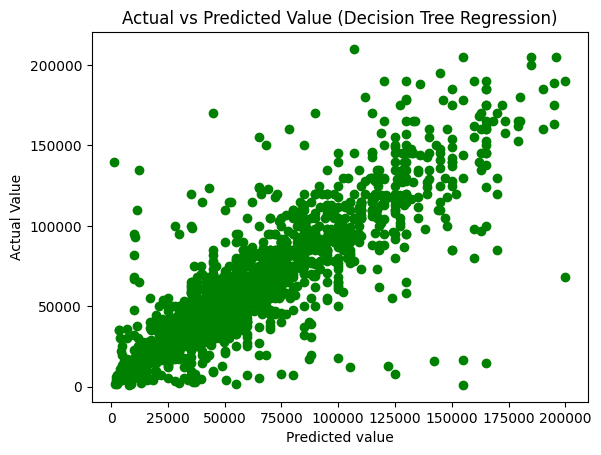

In [20]:
plt.scatter(decision_tree_regressor.predict(X_test),Y_test, color = 'green')  
plt.title('Actual vs Predicted Value (Decision Tree Regression)')  
plt.xlabel('Predicted value') 
plt.ylabel('Actual Value') 
plt.show() 

In [21]:
{"R-Squared 'Higher is better': ":decision_tree_regressor.score(X_test,Y_test),"Mean Squared Error (MSE) 'Lower is better': ":mean_squared_error(Y_test,decision_tree_regressor.predict(X_test))}

{"R-Squared 'Higher is better': ": 0.7062305600691945,
 "Mean Squared Error (MSE) 'Lower is better': ": 424250413.1062915}

##### Now let's see what other algorithms have

#### K-Nearest Neighbors (kNN)

In [22]:
best_score = 0
best_number = 0
for number in range(1,30):
    kNN_regressor = KNeighborsRegressor(n_neighbors=number)
    kNN_regressor.fit(X_train,Y_train)
    score = kNN_regressor.score(X_test,Y_test)
    if score > best_score:
        best_score = score
        best_number = number
"Best n_neighbors: ",best_number," Best R-Squared: ",best_score

('Best n_neighbors: ', 6, ' Best R-Squared: ', 0.7475141428091503)

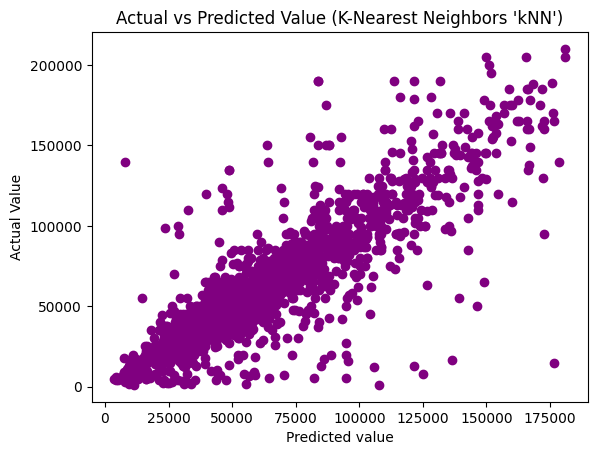

{"R-Squared 'Higher is better': ": 0.7475141428091503,
 "Mean Squared Error (MSE) 'Lower is better': ": 364630266.6538239}

In [23]:
kNN_regressor = KNeighborsRegressor(n_neighbors=6)
kNN_regressor.fit(X_train,Y_train)

plt.scatter(kNN_regressor.predict(X_test),Y_test, color = 'purple')  
plt.title("Actual vs Predicted Value (K-Nearest Neighbors 'kNN')")  
plt.xlabel('Predicted value') 
plt.ylabel('Actual Value') 
plt.show() 

{"R-Squared 'Higher is better': ":kNN_regressor.score(X_test,Y_test),"Mean Squared Error (MSE) 'Lower is better': ":mean_squared_error(Y_test,kNN_regressor.predict(X_test))}

In [24]:
mean_squared_error(Y_test,kNN_regressor.predict(X_test))

364630266.6538239

#### I've talked about two approaches at the beginning, the sperate Brand and Model, and the combined Brand and Model, doing the sperate Brand and Model resulted in:

##### Here is the "kNN Model" with
##### R-Squared: 0.7475141428091503, Mean Squared Error (MSE): 364630266.6538239
##### compared to the "Decision Tree" with 
##### R-Squared: 0.7062305600691945, Mean Squared Error (MSE): 424250413.1062915

#### The Combined Brand_Model Approach resulted in:

##### Here is the "kNN Model" with 
##### R-Squared: 0.7353625400311552, Mean Squared Error: 382179139.33330446
##### compared to the "Decision Tree" with 
##### R-Squared: 0.7099817191842754, Mean Squared Error (MSE): 418833134.8333189

### The Winner is the"kNN Model" from the seperate Brand,Model Approach, and that's what we're going to use in the microservice.